# Analise de dados de estudantes
Dados de reprovados/aprovados de uma classe

https://www.youtube.com/watch?v=HrRA67O-QXI

In [1]:
data = [50,50,47,97,49,3,53,42,26,74,82,62,37,15,70,27,36,35,48,52,63,64]
print(data)

[50, 50, 47, 97, 49, 3, 53, 42, 26, 74, 82, 62, 37, 15, 70, 27, 36, 35, 48, 52, 63, 64]


In [2]:
import numpy as np

grades = np.array(data)

print(grades*2)

[100 100  94 194  98   6 106  84  52 148 164 124  74  30 140  54  72  70
  96 104 126 128]


In [3]:
# Tamanho da lista
grades.shape

(22,)

In [4]:
# Pega o 6º item da lista
grades[5]

3

In [5]:
# Média das notas
round(grades.mean(), 2)

49.18

In [6]:
study_hours = [10.0,11.5,9.0,16.0,9.25,1.0,11.5,9.0,8.5,14.5,15.5,
               13.75,9.0,8.0,15.5,8.0,9.0,6.0,10.0,12.0,12.5,12.0]

student_data = np.array([study_hours, grades])

In [7]:
# [Segundo array][Primeiro array]
student_data[0][0]

10.0

In [8]:
# Tempo médio de estudo
avg_study = student_data[0].mean()
avg_grade = student_data[1].mean()

print(f'Average study time: {avg_study}\nAverage grade: {avg_grade}')

Average study time: 10.522727272727273
Average grade: 49.18181818181818


In [9]:
import pandas as pd

df_students = pd.DataFrame({'Name': ['Dan', 'Joann', 'Pedro', 'Rosie', 'Ethan', 'Vicky', 'Frederic', 'Jimmie', 
                                     'Rhonda', 'Giovanni', 'Francesca', 'Rajab', 'Naiyana', 'Kian', 'Jenny',
                                     'Jakeem','Helena','Ismat','Anila','Skye','Daniel','Aisha'],
                            'StudyHours':student_data[0],
                            'Grade':student_data[1]})

df_students 

,Name,StudyHours,Grade
0,Dan,10.00,50.0
1,Joann,11.50,50.0
2,Pedro,9.00,47.0
3,Rosie,16.00,97.0
4,Ethan,9.25,49.0
5,Vicky,1.00,3.0
6,Frederic,11.50,53.0
7,Jimmie,9.00,42.0
8,Rhonda,8.50,26.0
9,Giovanni,14.50,74.0


In [10]:
df_students.loc[5]

Name          Vicky
StudyHours      1.0
Grade           3.0
Name: 5, dtype: object

In [11]:
df_students.loc[5, 'Grade']

3.0

In [12]:
df_students[df_students['Name']=='Vicky']

,Name,StudyHours,Grade
5,Vicky,1.0,3.0


In [13]:
df_students.query('Name=="Vicky"')

,Name,StudyHours,Grade
5,Vicky,1.0,3.0


In [14]:
df_students[df_students.Name=="Vicky"]

,Name,StudyHours,Grade
5,Vicky,1.0,3.0


In [15]:
# Importa um arquivo .csv
df_students = pd.read_csv('grades.csv',delimiter=',',header='infer')

In [16]:
df_students

,Name,StudyHours,Grade
0,Dan,10.00,50.0
1,Joann,11.50,50.0
2,Pedro,9.00,47.0
3,Rosie,16.00,97.0
4,Ethan,9.25,49.0
5,Vicky,1.00,3.0
6,Frederic,11.50,53.0
7,Jimmie,9.00,42.0
8,Rhonda,8.50,26.0
9,Giovanni,14.50,74.0


In [17]:
# Mostra se tem algum valor nulo
df_students.isnull().sum() # .sum() mostra a quantidade de valores nulos e onde estão

Name          0
StudyHours    1
Grade         2
dtype: int64

In [18]:
# Pega a média de horas estudadas e coloca nos valores nulos da tabela
df_students.StudyHours = df_students.StudyHours.fillna(df_students.StudyHours.mean())

In [19]:
# Colunas axis=1, linhas axis=0 e ignora valores nulos
df_students = df_students.dropna(axis=0)

In [20]:
# Pega as horas médias de estuda usando o nome da coluna como um index
mean_study = df_students['StudyHours'].mean()

# Pega a nota média usando o nome da coluna como uma propriedade
mean_grade = df_students.Grade.mean()

# Print a nota média e as horas de estudo médias
print('Average weekly study hours: {:.2f}\nAverage grade: {:.2f}'.format(mean_study, mean_grade))

Average weekly study hours: 10.52
Average grade: 49.18


In [21]:
# Mostra quem estudou mais tempo que a média
df_students[df_students.StudyHours > mean_study]

,Name,StudyHours,Grade
1,Joann,11.50,50.0
3,Rosie,16.00,97.0
6,Frederic,11.50,53.0
9,Giovanni,14.50,74.0
10,Francesca,15.50,82.0
11,Rajab,13.75,62.0
14,Jenny,15.50,70.0
19,Skye,12.00,52.0
20,Daniel,12.50,63.0
21,Aisha,12.00,64.0


In [22]:
# Mostra a nota média dentre quem estou mais
df_students[df_students.StudyHours > mean_study].Grade.mean()

66.7

In [23]:
# Mostra se o estudante passou caso tenha nota maior ou igual a 6
passed = pd.Series(df_students.Grade >= 60)
df_students = pd.concat([df_students, passed.rename('Passed')], axis=1)

In [24]:
# Mostra a quantidade de pessoas que passaram
df_students.groupby(df_students.Passed).Name.count()

Passed
False    15
True      7
Name: Name, dtype: int64

In [25]:
# Mostra a nota média e a quantidade de horas entre quem passou ou não 
df_students.groupby(df_students.Passed)[['StudyHours', 'Grade']].mean()

,StudyHours,Grade
Passed,,
False,8.783333,38.000000
True,14.250000,73.142857


In [26]:
# Ordena a lista em ordem crescente
df_students = df_students.sort_values('Grade', ascending=True)

C:\Users\jvito\AppData\Local\Temp\ipykernel_21448\822340474.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(df_students.Name, rotation=90)
C:\Users\jvito\AppData\Local\Temp\ipykernel_21448\822340474.py:14: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


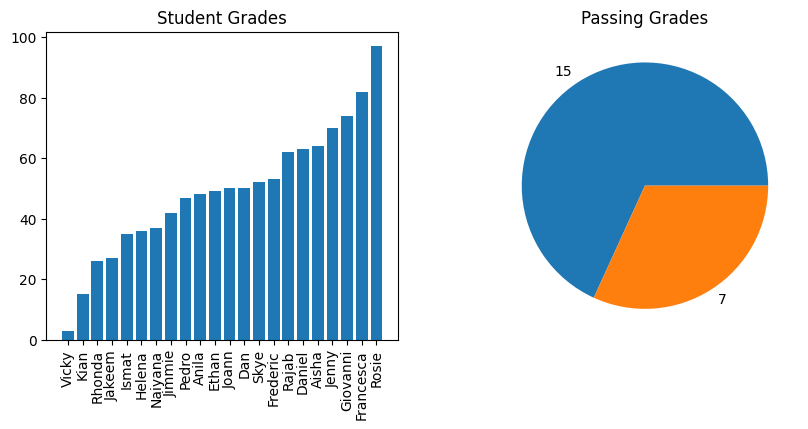

In [27]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(10, 4))

ax[0].bar(x=df_students.Name, height=df_students.Grade)

ax[0].set_title("Student Grades")
ax[0].set_xticklabels(df_students.Name, rotation=90)

passes_count = df_students.Passed.value_counts()
ax[1].pie(passes_count, labels=passes_count)
ax[1].set_title("Passing Grades")

fig.show()

<Axes: xlabel='Name'>

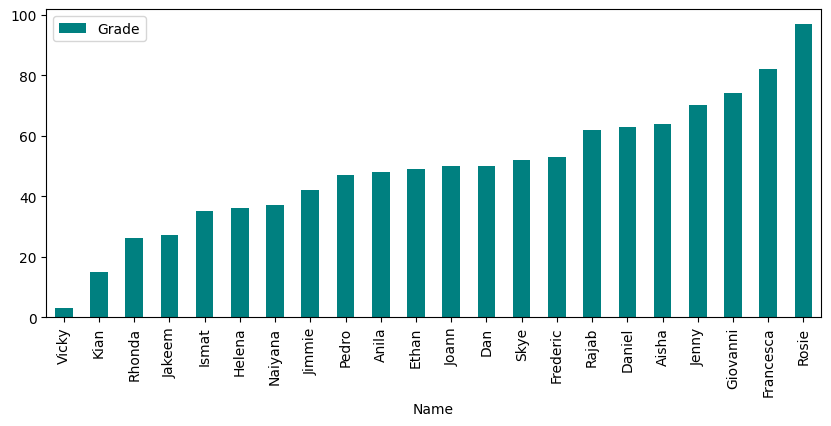

In [28]:
df_students.plot.bar(x='Name', y='Grade', figsize=(10,4), color="teal")

Minimum: 3.0
Maximum: 97.0
Median: 49.18181818181818
Median: 49.5
Mode: 50.0


C:\Users\jvito\AppData\Local\Temp\ipykernel_21448\1493993194.py:25: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
C:\Users\jvito\AppData\Local\Temp\ipykernel_21448\1493993194.py:26: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


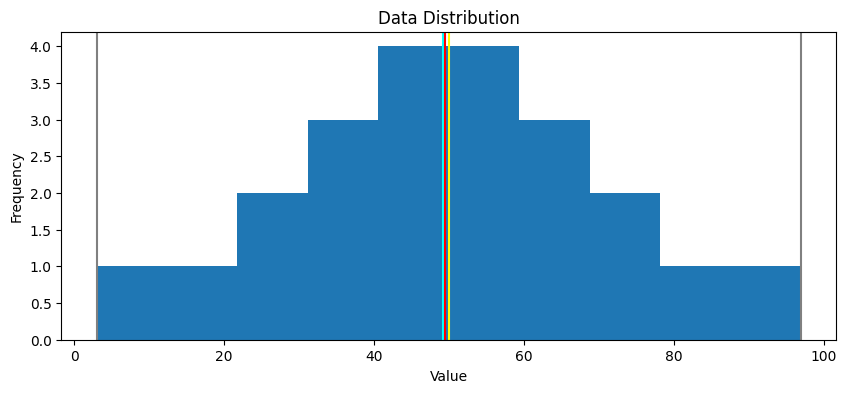

In [29]:
grades = df_students.Grade

min_val = df_students.Grade.min()
max_val = df_students.Grade.max()
mean_val = df_students.Grade.mean()
med_val = df_students.Grade.median()
mode_val = df_students.Grade.mode()[0]

print(f'Minimum: {min_val}\nMaximum: {max_val}\nMedian: {mean_val}\nMedian: {med_val}\nMode: {mode_val}')

fig = plt.figure(figsize=(10,4))

plt.hist(grades)

plt.axvline(x=min_val, color="gray")
plt.axvline(x=max_val, color="gray")
plt.axvline(x=mean_val, color="cyan")
plt.axvline(x=med_val, color="red")
plt.axvline(x=mode_val, color="yellow")

plt.title("Data Distribution")
plt.xlabel("Value")
plt.ylabel("Frequency")

fig.show()
fig.show()

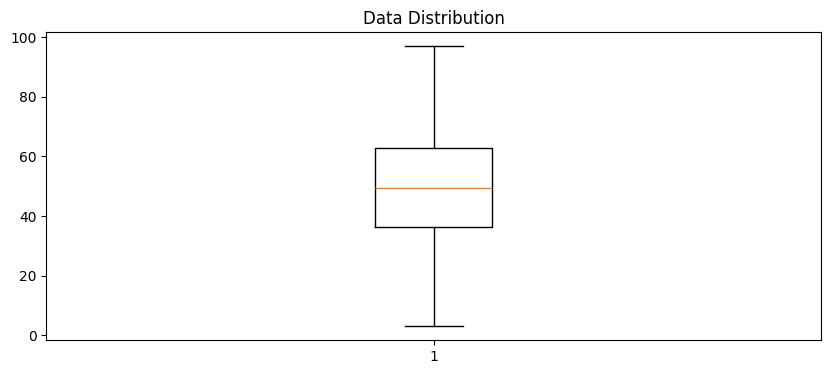

In [30]:
grades = df_students.Grade

fig = plt.figure(figsize=(10,4))

plt.boxplot(grades)

plt.title("Data Distribution")

plt.show()

Minimum:3.00
Mean:49.18
Median:49.50
Mode:50.00
Maximum:97.00



C:\Users\jvito\AppData\Local\Temp\ipykernel_21448\442012799.py:40: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


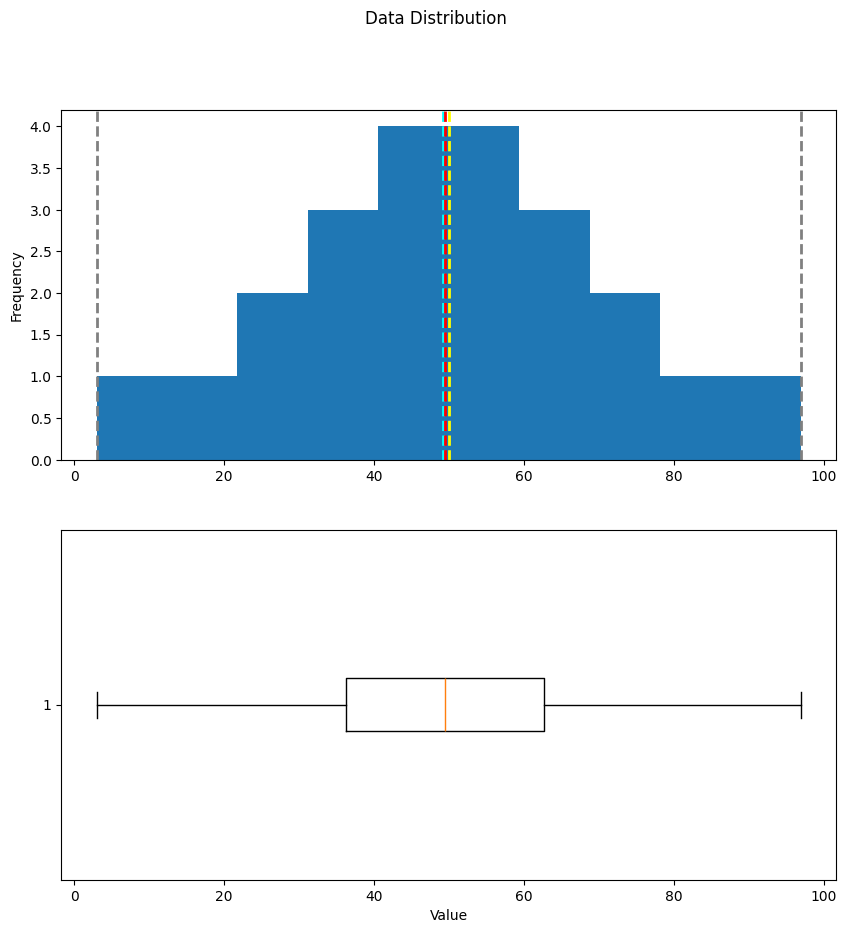

In [31]:
# Create a function that we can re-use
def show_distribution(var_data):
    from matplotlib import pyplot as plt

    # Get statistics
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    med_val = var_data.median()
    mod_val = var_data.mode()[0]

    print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                            mean_val,
                                                                                            med_val,
                                                                                            mod_val,
                                                                                            max_val))

    # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize = (10,10))

    # Plot the histogram   
    ax[0].hist(var_data)
    ax[0].set_ylabel('Frequency')

    # Add lines for the mean, median, and mode
    ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

    # Plot the boxplot   
    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel('Value')

    # Add a title to the Figure
    fig.suptitle('Data Distribution')

    # Show the figure
    fig.show()

# Get the variable to examine
col = df_students['Grade']
# Call the function
show_distribution(col)

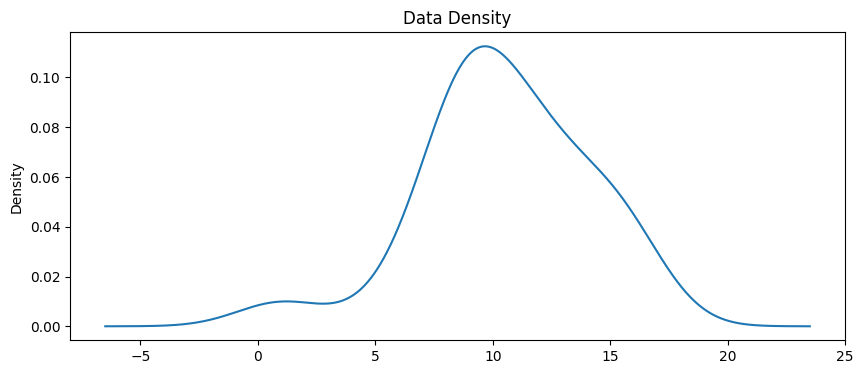

In [32]:
def show_density(data):
    fig = plt.figure(figsize=(10,4))
    
    data.plot.density()
    
    plt.title("Data Density")
    
    plt.show()
    
show_density(df_students.StudyHours)